In [103]:
#Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# Loading the dataset
import os
os.getcwd()
songs = pd.read_csv('SpotifyFeatures.csv')
songs.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
#Sanity checking the dataset
pd.isnull(songs).sum()/songs.shape[0]

genre               0.0
artist_name         0.0
track_name          0.0
track_id            0.0
popularity          0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
speechiness         0.0
tempo               0.0
time_signature      0.0
valence             0.0
dtype: float64

In [5]:
songs.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [6]:
#Checking for duplicate rows
sum(songs.duplicated(subset = ["track_id"]))

55951

In [7]:
#Dropping duplicates
songs.drop_duplicates(subset = ["track_id"], inplace = True)
songs.shape

(176774, 18)

Now that the dataset looks fine, we can do some EDA

## EDA

### Songs per genre

In [8]:
len(songs.genre.value_counts())
songs.genre.value_counts()

Comedy              9674
Electronic          9149
Alternative         9095
Anime               8935
Classical           8711
Reggae              8687
Reggaeton           8549
Blues               8496
Soundtrack          8480
Opera               8280
Folk                8048
Jazz                8039
Ska                 8017
Dance               7982
World               7973
Movie               7802
Hip-Hop             7413
Country             7383
Children's Music    5402
R&B                 5353
Soul                4430
Indie               3318
Pop                 2417
Rock                2227
Rap                 1456
Children’s Music    1339
A Capella            119
Name: genre, dtype: int64

In [9]:
# We see there are 2 Children's music, so lets combine them into one
songs.replace({"Children's Music":"Children’s Music"}, inplace = True)
len(songs.genre.value_counts())

26

### Finding the most popular artists in each genre

In [104]:
rap = songs[songs['genre'] == "Rap"]

In [77]:
#Keeping artists with only 5+ songs
keep = rap["artist_name"].value_counts().sort_values(ascending = False)
rap = rap[rap.artist_name.isin(keep.index[keep.gt(5)])]

In [82]:
best_rap = rap.groupby("artist_name").popularity.mean().sort_values(ascending = False).reset_index()[:10]
best_rap["popularity"] = best_rap.popularity.round(2)
best_rap

,artist_name,popularity
0,The Weeknd,81.50
1,Post Malone,78.00
2,Alle Farben,75.50
3,Juice WRLD,75.50
4,XXXTENTACION,75.31
5,Mozart La Para,74.00
6,Christian French,74.00
7,Beau Young Prince,74.00
8,Luniz,74.00
9,Amenazzy,73.67


In [89]:
summary = []

for i in songs["genre"].unique():
    df = songs[songs["genre"] == i]
    keep = df["artist_name"].value_counts().sort_values(ascending = False)
    df = df[df.artist_name.isin(keep.index[keep.gt(5)])]
    df = df.groupby("artist_name").popularity.mean().sort_values(ascending = False).reset_index()[:10]
    df["popularity"] = df.popularity.round(2)
    display(i,df)
    summary.append("The most popular artist in " + i + " is " + df.iloc[0,0])


'Movie'

,artist_name,popularity
0,The Bellas,55.14
1,Kristen Bell,53.86
2,Josh Gad,50.62
3,Adam Jacobs,36.50
4,Justin Hurwitz,35.01
5,Mandy Gonzalez,34.69
6,Mozart Opera Rock,34.06
7,Chorus - Pocahontas,33.67
8,Ilene Woods,32.38
9,Pat Carroll,32.38


'R&B'

,artist_name,popularity
0,Greeicy,67.67
1,Rels B,67.62
2,ROSALÍA,62.85
3,Daniel Caesar,61.88
4,Jorja Smith,61.21
5,Kehlani,59.75
6,Ella Mai,59.39
7,The Weeknd,59.09
8,DEAN,58.42
9,Rex Orange County,58.00


'A Capella'

,artist_name,popularity
0,MC6 A Cappella,22.60
1,Glad,10.14
2,The Singers Unlimited,9.64
3,The King's Singers,4.61
4,Hyannis Sound,1.78


'Alternative'

,artist_name,popularity
0,Hombres G,63.67
1,Joji,62.50
2,Dread Mar I,62.43
3,Calle 13,62.43
4,Los Enanitos Verdes,62.29
5,Café Tacvba,62.25
6,Julieta Venegas,61.83
7,Frank Ocean,61.67
8,Caifanes,61.62
9,Still Woozy,61.30


'Country'

,artist_name,popularity
0,Luke Combs,65.04
1,Chris Stapleton,59.58
2,Brett Young,58.00
3,Dan + Shay,56.72
4,Kane Brown,55.27
5,Old Dominion,54.94
6,The Guess Who,50.83
7,Three Dog Night,50.71
8,Lonestar,50.18
9,Keith Urban,50.15


'Dance'

,artist_name,popularity
0,benny blanco,80.17
1,Alec Benjamin,71.83
2,Camila Cabello,71.06
3,Bazzi,70.53
4,Hailee Steinfeld,70.36
5,Ariana Grande,70.29
6,James TW,68.83
7,King Princess,68.71
8,Vigiland,68.57
9,Liam Payne,68.33


'Electronic'

,artist_name,popularity
0,Adam Beyer,50.29
1,High Contrast,50.12
2,Dwin,49.82
3,Lucky Luke,49.74
4,The Stone Roses,49.35
5,Ekali,49.00
6,Bicep,48.00
7,Gaullin,47.90
8,Happy Mondays,47.25
9,Taska Black,46.33


'Anime'

,artist_name,popularity
0,REOL,43.62
1,KOBUKURO,40.75
2,BUMP OF CHICKEN,40.00
3,MYTH & ROID,39.86
4,Linked Horizon,38.92
5,AAA,38.71
6,Leo Ieiri,38.67
7,Mrs. GREEN APPLE,38.21
8,My Little Lover,37.88
9,EXILE,37.80


'Folk'

,artist_name,popularity
0,The Doobie Brothers,65.86
1,Supertramp,64.44
2,Dermot Kennedy,63.89
3,Steve Miller Band,62.57
4,The Band,62.00
5,The Supremes,62.00
6,Tom Walker,61.73
7,Juke Ross,61.43
8,The Allman Brothers Band,61.29
9,America,60.67


'Blues'

,artist_name,popularity
0,Greta Van Fleet,58.57
1,Royal Blood,47.35
2,Cage The Elephant,46.57
3,Leon Bridges,46.26
4,Bachman-Turner Overdrive,46.00
5,The Marvelettes,42.60
6,Jackie Wilson,42.27
7,Ann Peebles,42.12
8,The Shirelles,41.57
9,Nina Simone,41.52


'Opera'

,artist_name,popularity
0,Francesco Nicola Fago,25.75
1,Jonas Kaufmann,24.85
2,Christina Pluhar,24.76
3,Andreas Scholl,24.56
4,Luciano Pavarotti,24.20
5,Katherine Jenkins,22.99
6,Anne Sofie von Otter,22.00
7,Mirella Freni,21.92
8,Leo Nucci,21.73
9,Philippe Jaroussky,21.43


'Hip-Hop'

,artist_name,popularity
0,Paulo Londra,75.90
1,Danny Ocean,75.50
2,Offset,73.95
3,Tory Lanez,73.90
4,XXXTENTACION,72.60
5,Metro Boomin,72.57
6,Lil Peep,71.61
7,SZA,71.40
8,Zion & Lennox,71.14
9,Bryson Tiller,70.67


'Children’s Music'

,artist_name,popularity
0,H.E.R.,67.17
1,Summer Walker,63.77
2,YUNGBLUD,61.45
3,half•alive,60.17
4,Ozzy Osbourne,60.07
5,BØRNS,59.88
6,Foster The People,59.78
7,Jimmy Eat World,59.57
8,Fitz and The Tantrums,59.50
9,Two Feet,59.50


'Rap'

,artist_name,popularity
0,The Weeknd,81.50
1,Post Malone,78.00
2,Juice WRLD,75.50
3,XXXTENTACION,75.31
4,6ix9ine,72.92
5,Travis Scott,72.81
6,Lil Mosey,71.62
7,Cardi B,66.47
8,Trippie Redd,65.69
9,Kina,65.33


'Indie'

,artist_name,popularity
0,Rex Orange County,71.50
1,Two Feet,66.00
2,The Mayries,65.53
3,Noah Kahan,63.71
4,Sara Farell,63.62
5,Anna Clendening,61.67
6,YUNGBLUD,61.67
7,boy pablo,61.27
8,Ruth B.,61.00
9,Hearts & Colors,60.67


'Classical'

,artist_name,popularity
0,Helloween,49.90
1,Mr. Big,49.00
2,Avantasia,45.82
3,Jean-Yves Thibaudet,45.80
4,Rhapsody,44.83
5,Freedom Call,44.43
6,Dream Evil,44.29
7,Rhapsody Of Fire,44.00
8,Hammerfall,43.90
9,Bloodbound,43.67


'Pop'

,artist_name,popularity
0,Martin Garrix,81.86
1,Piso 21,80.50
2,Billie Eilish,80.50
3,Becky G,79.29
4,Manuel Turizo,79.00
5,Maluma,78.33
6,Sebastian Yatra,77.50
7,CNCO,75.25
8,Khalid,74.44
9,J Balvin,73.46


'Reggae'

,artist_name,popularity
0,O Rappa,58.91
1,Maneva,58.20
2,Nonpalidece,57.67
3,Armandinho,56.38
4,Moral Distraida,56.29
5,Santaferia,56.18
6,Onze:20,55.14
7,Movimiento Original,53.06
8,Natiruts,53.02
9,Sticky Fingers,52.82


'Reggaeton'

,artist_name,popularity
0,Bad Bunny,72.00
1,Lunay,67.83
2,Anuel Aa,63.25
3,Ozuna,62.52
4,Pepe Quintana,60.33
5,Karol G,58.92
6,Brytiago,57.57
7,Alex Rose,57.52
8,CNCO,56.62
9,Natti Natasha,56.12


'Jazz'

,artist_name,popularity
0,Natalie Cole,51.36
1,Zaz,51.31
2,Bobby Darin,51.14
3,Roberta Flack,51.12
4,Emilie-Claire Barlow,50.86
5,Kelsea Ballerini,50.56
6,Buena Vista Social Club,50.33
7,Steve Tyrell,49.73
8,Tony Vega,49.50
9,digitalluc,49.33


'Rock'

,artist_name,popularity
0,Toto,70.17
1,Bon Jovi,68.00
2,Bee Gees,67.80
3,Twenty One Pilots,67.74
4,Guns N' Roses,65.62
5,Jon Pardi,65.29
6,Scorpions,65.29
7,Imagine Dragons,64.70
8,Elvis Presley,64.50
9,Bring Me The Horizon,64.11


'Ska'

,artist_name,popularity
0,La Raíz,54.00
1,Los Auténticos Decadentes,49.89
2,Los Caligaris,49.39
3,Salon Victoria,48.14
4,Bersuit Vergarabat,48.00
5,La Mosca Tse-Tse,46.57
6,Panteon Rococo,44.59
7,Soda Stereo,44.03
8,Ska-P,43.74
9,Nonpalidece,43.71


'Comedy'

,artist_name,popularity
0,Bill Burr,46.07
1,John Mulaney,45.39
2,Daniel Tosh,43.23
3,Bo Burnham,41.63
4,Joe Rogan,40.49
5,Tom Segura,37.25
6,Gabriel Iglesias,36.11
7,Anthony Jeselnik,35.33
8,Aziz Ansari,35.31
9,Jim Gaffigan,35.11


'Soul'

,artist_name,popularity
0,The Jacksons,55.67
1,Seinabo Sey,55.17
2,Adele,53.80
3,Barry White,53.64
4,Rag'n'Bone Man,53.44
5,Yoste,52.00
6,Paloma Faith,50.88
7,RITUAL,50.62
8,Izzy Bizu,50.43
9,Michl,50.33


'Soundtrack'

,artist_name,popularity
0,Marc Shaiman,45.00
1,Mikolai Stroinski,44.35
2,Jeremy Soule,42.61
3,Marcin Przybyłowicz,42.31
4,Mark Mancina,41.35
5,Christopher Larkin,40.88
6,Vangelis,40.58
7,Bill Elm & Woody Jackson,40.40
8,Alberto Iglesias,40.00
9,Nicholas Hooper,40.00


'World'

,artist_name,popularity
0,Leonardo Gonçalves,51.50
1,Steffany Gretzinger,48.00
2,Symphony Worship,46.83
3,Bethel Music,46.58
4,Victory Worship,45.78
5,Pat Barrett,45.53
6,JPCC Worship,45.38
7,Manu Chao,44.96
8,Amanda Lindsey Cook,44.82
9,The Belonging Co,43.53


In [90]:
keep = songs["artist_name"].value_counts().sort_values(ascending = False)
df = songs[songs.artist_name.isin(keep.index[keep.gt(5)])]
df = df.groupby("artist_name").popularity.mean().sort_values(ascending = False).reset_index()
summary.append("The most popular artist in the dataset is "+ df.iloc[0,0])
summary

['The most popular artist in Movie is The Bellas',
 'The most popular artist in R&B is Greeicy',
 'The most popular artist in A Capella is MC6 A Cappella',
 'The most popular artist in Alternative is Hombres G',
 'The most popular artist in Country is Luke Combs',
 'The most popular artist in Dance is benny blanco',
 'The most popular artist in Electronic is Adam Beyer',
 'The most popular artist in Anime is REOL',
 'The most popular artist in Folk is The Doobie Brothers',
 'The most popular artist in Blues is Greta Van Fleet',
 'The most popular artist in Opera is Francesco Nicola Fago',
 'The most popular artist in Hip-Hop is Paulo Londra',
 'The most popular artist in Children’s Music is H.E.R.',
 'The most popular artist in Rap is The Weeknd',
 'The most popular artist in Indie is Rex Orange County',
 'The most popular artist in Classical is Helloween',
 'The most popular artist in Pop is Martin Garrix',
 'The most popular artist in Reggae is O Rappa',
 'The most popular artist in 

### The most popular artists in the dataset

In [91]:
df[:10]

,artist_name,popularity
0,Martin Garrix,81.857143
1,Billie Eilish,80.500000
2,Piso 21,80.500000
3,Sebastian Yatra,77.500000
4,Paulo Londra,75.900000
5,Post Malone,75.720930
6,Juice WRLD,75.500000
7,benny blanco,75.250000
8,Khalid,74.437500
9,Offset,73.950000


### Popularity distribution

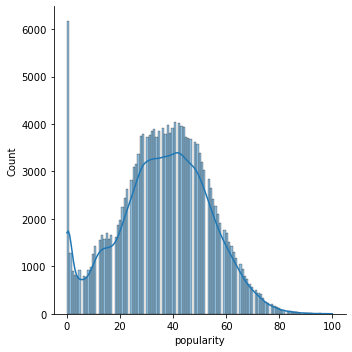

In [15]:
sns.displot(songs["popularity"], kde = True)

We see there are an overwhelming amount of songs with 0 popularity. To have better predictions from the model we shall remove these values as we would prefer to predict popularity for songs that are somewhat popular.

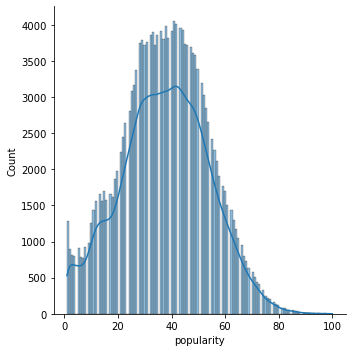

In [16]:
songs_1 = songs[songs["popularity"]!=0]
sns.displot(songs_1["popularity"], kde = True)

In [17]:
songs_1.shape

(170604, 18)

In [18]:
#Converting duration from ms to s for simplicity
songs_1["duration_min"] = songs_1["duration_ms"].apply(lambda x:x/60000)
songs_1 = songs_1.drop(["duration_ms"], axis = 1)
songs_1.head()

<ipython-input-18-c49f41665a0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_1["duration_min"] = songs_1["duration_ms"].apply(lambda x:x/60000)


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0.737,0.000,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816,2.289550
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,0.131,0.000,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368,2.837783
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,0.225,0.123,F,0.202,-21.150,Major,0.0456,140.576,4/4,0.390,1.377083
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.344,0.703,0.270,0.000,C#,0.105,-12.675,Major,0.9530,82.873,4/4,0.533,3.538217
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.939,0.416,0.269,0.000,F#,0.113,-8.949,Major,0.0286,96.827,4/4,0.274,4.001117


### Some more EDA

<AxesSubplot:xlabel='duration_min', ylabel='popularity'>

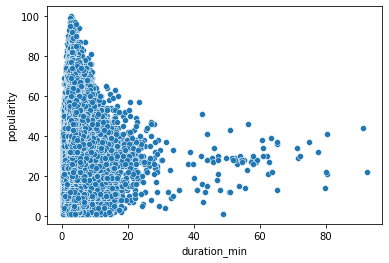

In [21]:
#Duration vs Popularity
sns.scatterplot(x = songs_1.duration_min, y = songs_1.popularity)

We see the most popular songs are within the 0-10 min mark, so lets zoom in to that

<AxesSubplot:xlabel='duration_min', ylabel='popularity'>

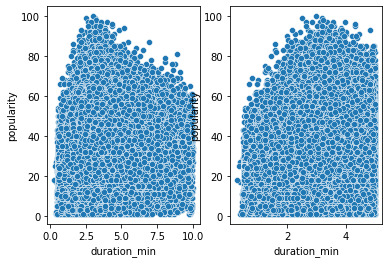

In [35]:
songs_short_duration = songs_1[songs_1["duration_min"]<= 5]
songs_medium_duration = songs_1[songs_1["duration_min"]<= 10]
fig, ax = plt.subplots(1,2)
sns.scatterplot(x = songs_short_duration.duration_min, y = songs_short_duration.popularity, ax = ax[1])
sns.scatterplot(x = songs_medium_duration.duration_min, y = songs_medium_duration.popularity, ax = ax[0])

<AxesSubplot:xlabel='valence', ylabel='popularity'>

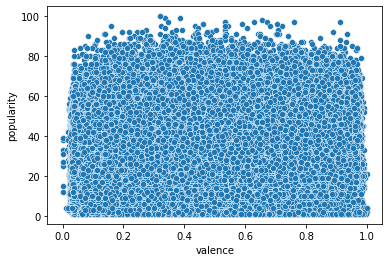

In [33]:
#Valence vs Popularity
sns.scatterplot(x = songs_1.valence, y = songs_1.popularity)

<AxesSubplot:xlabel='mode', ylabel='popularity'>

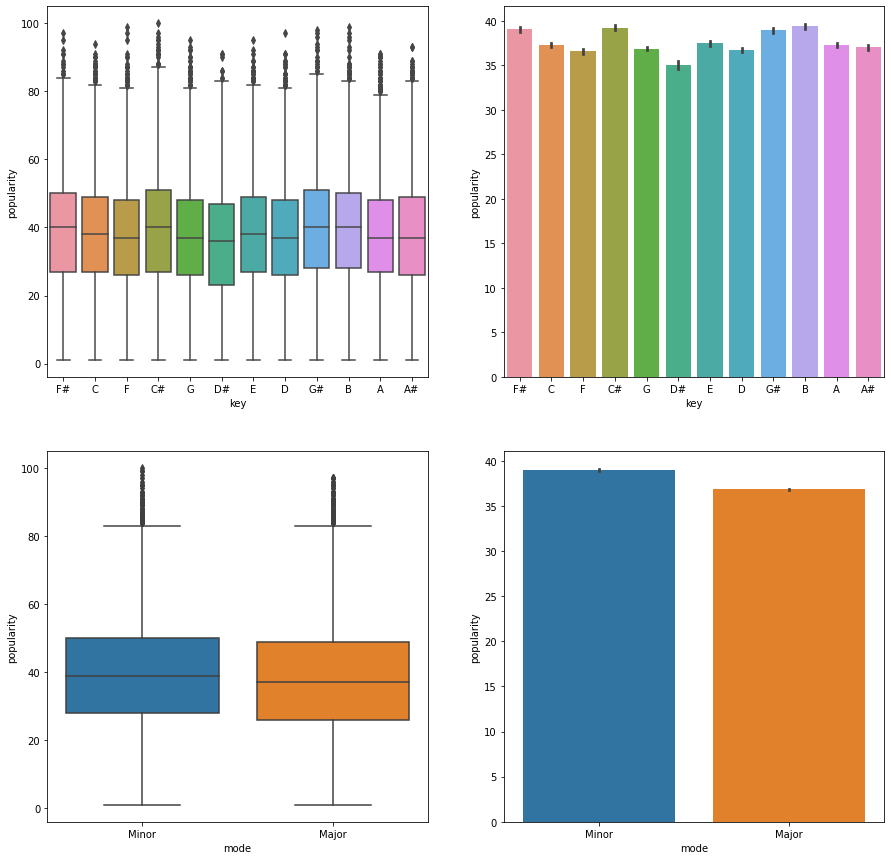

In [45]:
#Key and Mode vs Popularity
fig, ax = plt.subplots(2,2,figsize=(15,15))
sns.boxplot(x = songs_1.key, y = songs_1.popularity, ax = ax[0,0])
sns.barplot(x = songs_1.key, y = songs_1.popularity, ax = ax[0,1])
sns.boxplot(x = songs_1['mode'], y = songs_1.popularity, ax = ax[1,0])
sns.barplot(x = songs_1['mode'], y = songs_1.popularity, ax = ax[1,1])

<AxesSubplot:>

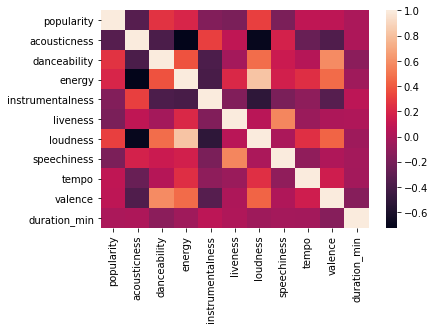

In [46]:
#Correlation plot
sns.heatmap(songs_1.corr())

### Feature Engineering

In [49]:
#Label encoding for the 3 categorical variables + Artist name
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(len(songs_1['key'].unique()))
print(len(songs_1['mode'].unique()))
print(len(songs_1['time_signature'].unique()))
print(len(songs_1['artist_name'].unique()))

12
2
5
14501


In [54]:
songs_1["key_encoded"] = label_encoder.fit_transform(songs_1['key'])
songs_1["mode_encoded"] = label_encoder.fit_transform(songs_1['mode'])
songs_1["time_signature_encoded"] = label_encoder.fit_transform(songs_1['time_signature'])
songs_1["name_encoded"] = label_encoder.fit_transform(songs_1['artist_name'])
songs_1["genre_encoded"] = label_encoder.fit_transform(songs_1['genre'])
songs_1.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,...,speechiness,tempo,time_signature,valence,duration_min,key_encoded,mode_encoded,time_signature_encoded,name_encoded,genre_encoded
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0.737,0.000,F#,...,0.0868,174.003,4/4,0.816,2.289550,9,1,3,8222,14
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,0.131,0.000,C,...,0.0362,99.488,5/4,0.368,2.837783,3,1,4,6430,14
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,0.225,0.123,F,...,0.0456,140.576,4/4,0.390,1.377083,8,0,3,4063,14
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.344,0.703,0.270,0.000,C#,...,0.9530,82.873,4/4,0.533,3.538217,4,0,3,8222,14
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.939,0.416,0.269,0.000,F#,...,0.0286,96.827,4/4,0.274,4.001117,9,0,3,7294,14


In [99]:
np.percentile(songs_1.popularity,90)

58.0

In [100]:
songs_1["is_popular"] = np.where(songs_1["popularity"]>58,1,0)

In [106]:
songs_1.corr()["popularity"].sort_values()

acousticness             -0.340024
liveness                 -0.188990
speechiness              -0.182181
instrumentalness         -0.156850
genre_encoded            -0.025355
key_encoded              -0.000871
duration_min              0.003228
name_encoded              0.022879
mode_encoded              0.063247
valence                   0.082653
tempo                     0.088707
time_signature_encoded    0.130833
energy                    0.199320
danceability              0.261871
loudness                  0.309635
is_popular                0.573877
is_popular_               0.631883
popularity                1.000000
Name: popularity, dtype: float64

# Getting dataset ready for machine learning

In [102]:
songs_1.to_csv("spotify_clean.csv", index = False)